# Concatenar y mergear datasets

Podemos por ejemplo concatenar dos datasets uno debajo del otro (scramblear o apilar)

In [1]:
import pandas as pd
import os

main_path = "/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets"

In [39]:
red_wine = pd.read_csv(os.path.join(main_path, "wine/winequality-red.csv"), sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
white_wine = pd.read_csv(os.path.join(main_path, "wine/winequality-white.csv"), sep=";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
wine_data = pd.concat([red_wine, white_wine], axis = 0)
wine_data.shape

(6497, 12)

## Carga y concatenación de un gran número de datasets ditribuidos

In [46]:
data = pd.read_csv(os.path.join(main_path, "distributed-data/001.csv"))
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [51]:
data = pd.read_csv(os.path.join(main_path, "distributed-data/001.csv"))

for i in range(2,333):
    part = pd.read_csv(os.path.join(main_path, "distributed-data/" + "%03d"%i + ".csv"))
    data = pd.concat([data, part], axis = 0)
    
data.shape

(772087, 4)

## Join de datasets

In [2]:
data_athletes = pd.read_csv(os.path.join(main_path, "athletes/Medals.csv"), encoding="ISO-8859-1")
#Si no ha sido guardado en utf-8 hay que indicar el encoding

data_athletes.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [3]:
athletes = data_athletes["Athlete"].unique()
athletes

array(['Michael Phelps', 'Natalie Coughlin', 'Aleksey Nemov', ...,
       'Wietse van Alten', 'Sandra Wagner-Sachse', 'Rod White'], dtype=object)

In [4]:
data_countries = pd.read_csv(os.path.join(main_path, "athletes/Athelete_Country_Map.csv"), encoding="ISO-8859-1")
data_countries.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [5]:
data_sports = pd.read_csv(os.path.join(main_path, "athletes/Athelete_Sports_Map.csv"), encoding="ISO-8859-1")
data_sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [9]:
data_athletes_country = pd.merge(left=data_athletes, right=data_countries, 
                                 left_on="Athlete",  right_on="Athlete")
data_athletes_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [13]:
#No tiene en cuenta que hay atletas en varios paises 
data_athletes_country[data_athletes_country["Athlete"] == "Aleksandar Ciric"]
#El problema es que el fichero de atletas es 1-M y debería ser 1-1

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1503,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1504,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia and Montenegro
1505,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1506,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia and Montenegro
1507,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia
1508,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia and Montenegro


In [16]:
data_countries.drop_duplicates(subset="Athlete", inplace=True)
#inplace es que lo quita del propio objeto en lugar de crear una copia

data_athletes_country = pd.merge(left=data_athletes, right=data_countries, 
                                 left_on="Athlete",  right_on="Athlete")
data_athletes_country[data_athletes_country["Athlete"] == "Aleksandar Ciric"]

#Ahora ya hemos quitado los duplicados de los paises

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1491,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1492,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1493,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia


In [18]:
data_sports.drop_duplicates(subset="Athlete", inplace=True)

data_athletes_country_sport = pd.merge(left=data_athletes_country, right=data_sports, 
                                 left_on="Athlete",  right_on="Athlete")
data_athletes_country_sport.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


In [22]:
from IPython.display import Image

## Inner Join

Lo que es común a los dos datasets<br><br>

Se pone el tipo en la opción how del merge

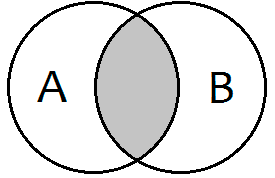

In [25]:
Image(filename="img/inner-join.png")

## Left Join

Es el dataset de la izquierda pero en las filas comunes al de la derecha se añade el dataset de la derecha. (No se omiten las de la izquierda que no estén en la derecha, se pondrán NAs)

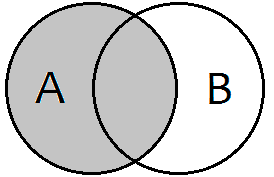

In [27]:
Image(filename="img/left-join.png")

## Right Join
Lo mismo que el left join pero al revés

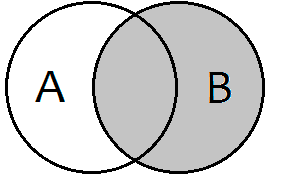

In [28]:
Image(filename="img/right-join.png")

## Outer Join
Es una combinación entre el right y el left join. <br>
Tendrá las filas en común y las no comunes (rellenando con NAs lo que falte)

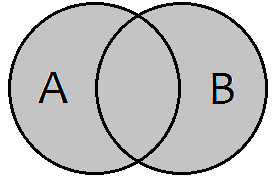

In [29]:
Image(filename="img/outer-join.png")